About Dataset
* This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more

Inspiration
There are several directions you can take with this dataset:
* Find out which team has the most aggressive defenders (or players for that matter)
* Which team had more players in the top 10 most assists chart
* Who were the players with most attempted passes
* Which players had the most accurate passes excluding the goal keeper and the defenders
* Defenders with most goals!!
* Which nation had the most aggressive players?


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

In [2]:
# Load Data
df = pd.read_csv("../input/english-premier-league202021/EPL_20_21.csv")
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


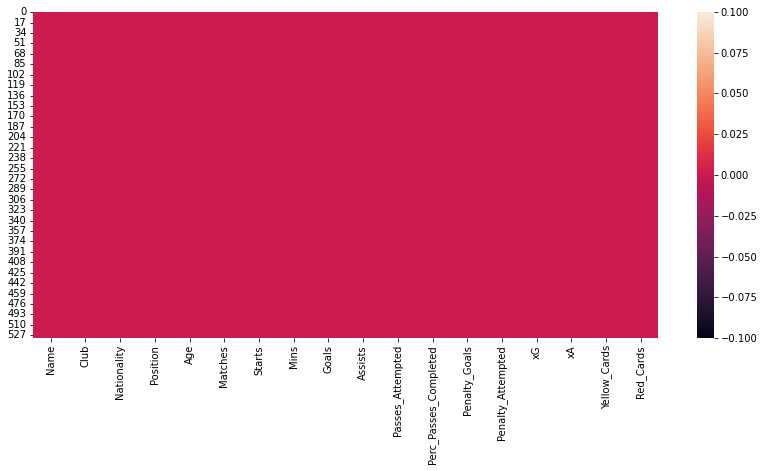

In [3]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isna());

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

## Q1: Find out which team has the most aggressive defenders (or players for that matter)

In [6]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [7]:
df["Club"].unique() , df["Club"].nunique()

(array(['Chelsea', 'Manchester City', 'Manchester United', 'Liverpool FC',
        'Leicester City', 'West Ham United', 'Tottenham Hotspur',
        'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
        'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
        'Southampton', 'Brighton', 'Burnley', 'Fulham',
        'West Bromwich Albion', 'Sheffield United'], dtype=object),
 20)

In [8]:
df.groupby("Club").Red_Cards.sum()

Club
Arsenal                    5
Aston Villa                4
Brighton                   6
Burnley                    0
Chelsea                    3
Crystal Palace             2
Everton                    2
Fulham                     3
Leeds United               1
Leicester City             0
Liverpool FC               0
Manchester City            2
Manchester United          1
Newcastle United           3
Sheffield United           3
Southampton                3
Tottenham Hotspur          2
West Bromwich Albion       4
West Ham United            3
Wolverhampton Wanderers    1
Name: Red_Cards, dtype: int64

In [9]:
x_cards = df.groupby("Club").Yellow_Cards.sum().index
y_cards = df.groupby("Club").Yellow_Cards.sum().values


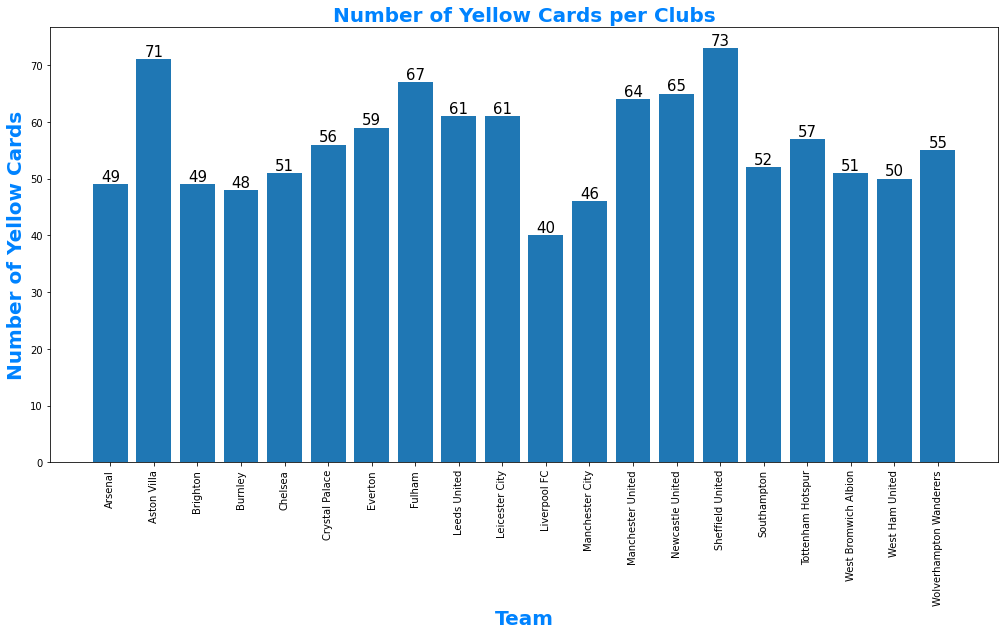

In [10]:
plt.figure(figsize=(17, 8));

plt.bar(x= x_cards , height= y_cards)

plt.title("Number of Yellow Cards per Clubs" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.xlabel("Team" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.ylabel("Number of Yellow Cards" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.xticks(rotation = 90)

for i in range(len(x_cards)):
    plt.text(i , y_cards[i] , y_cards[i] , ha= "center" , va= "bottom" , fontsize= "15")
    

plt.show()

In [11]:
p_cards = df.query("Club == 'Aston Villa'")
p_cards.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
264,Emiliano Martínez,Aston Villa,ARG,GK,27,38,38,3420,0,0,1295,65.6,0,0,0.00,0.01,1,0
265,Matt Targett,Aston Villa,ENG,DF,24,38,38,3404,0,2,2147,77.0,0,0,0.01,0.08,7,0
266,John McGinn,Aston Villa,SCO,MF,25,37,37,3330,3,5,1398,77.3,0,0,0.06,0.08,12,0
267,Ollie Watkins,Aston Villa,ENG,FW,24,37,37,3328,14,5,832,72.8,1,2,0.43,0.11,4,1
268,Tyrone Mings,Aston Villa,ENG,DF,27,36,36,3194,2,2,1585,79.6,0,0,0.05,0.02,6,1


In [12]:
p_cards.groupby("Name").Yellow_Cards.sum()

Name
Ahmed Elmohamady           2
Anwar El Ghazi             2
Bertrand Traoré            1
Carney Chukwuemeka         0
Conor Hourihane            0
Douglas Luiz              10
Emiliano Martínez          1
Ezri Konsa                 3
Jack Grealish              6
Jacob Ramsey               0
Jaden Philogene Bidace     0
John McGinn               12
Keinan Davis               0
Kortney Hause              2
Marvelous Nakamba          3
Matt Targett               7
Matty Cash                 8
Morgan Sanson              3
Neil Taylor                1
Ollie Watkins              4
Ross Barkley               0
Trézéguet                  0
Tyrone Mings               6
Wesley Moraes              0
Name: Yellow_Cards, dtype: int64

In [13]:
index = p_cards.groupby("Name").Yellow_Cards.sum().index
values = p_cards.groupby("Name").Yellow_Cards.sum().values

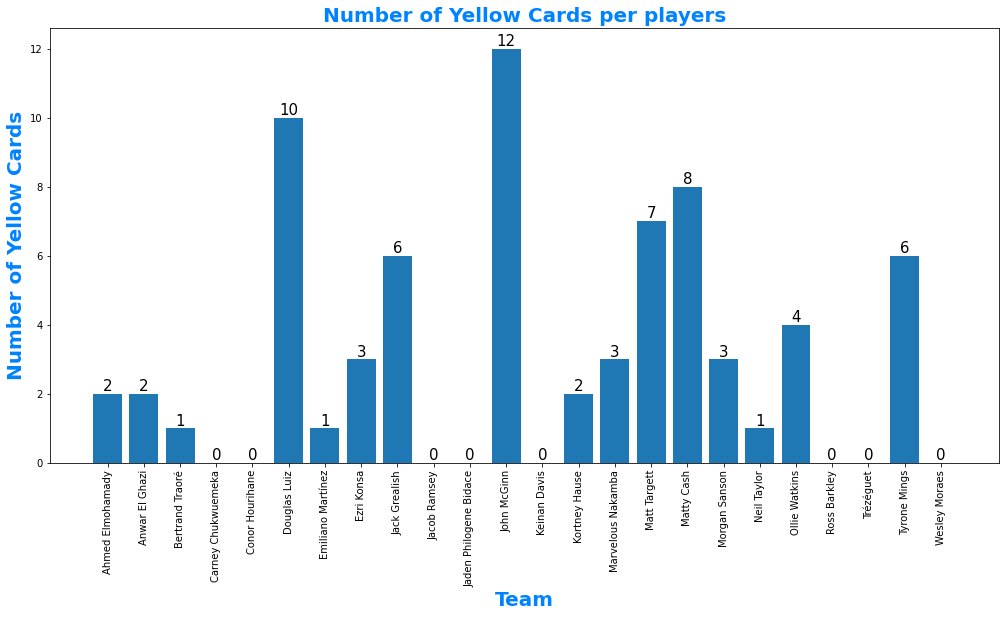

In [14]:
plt.figure(figsize=(17, 8));

plt.bar(x= index , height= values)

plt.title("Number of Yellow Cards per players" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.xlabel("Team" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.ylabel("Number of Yellow Cards" , fontsize= 20 , color= '#0083FF' ,fontweight= "bold")
plt.xticks(rotation = 90)

for i in range(len(index)):
    plt.text(i , values[i] , values[i] , ha= "center" , va= "bottom" , fontsize= "15")
    

plt.show()

## Q2: The Biggest Teams Passes

In [15]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [16]:
index = df.groupby("Club").Passes_Attempted.sum().index
values = df.groupby("Club").Passes_Attempted.sum().values
mean_v = values.mean()

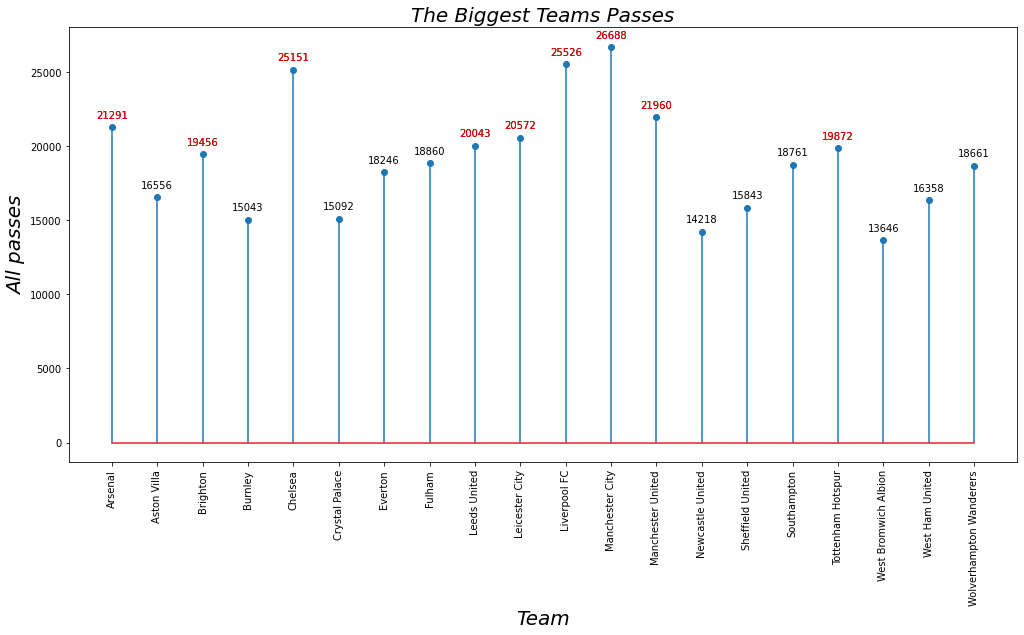

In [17]:
plt.figure(figsize=(17, 8))

plt.stem(index, values)

plt.title("The Biggest Teams Passes" , fontsize= 20, fontstyle= "italic")
plt.xlabel("Team" , fontsize= 20, fontstyle= "italic")
plt.ylabel("All passes" , fontsize= 20, fontstyle= "italic")

plt.xticks(rotation= 90)

for i in range(len(index)):
    plt.text(i , (values[i])+500 , values[i] , ha= "center" , va= "bottom" )
    if values[i] >= mean_v:        
        plt.text(i , (values[i])+500 , values[i] , ha= "center" , va= "bottom" , color= "r")
        
plt.show()

## Q3: Which players and teams in the top 10 most passes chart

In [18]:
# pass complete not perc per player

Passes_Completed = (df.Passes_Attempted *df.Perc_Passes_Completed)/100

df["Passes_Completed"] = Passes_Completed.astype("int")
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,1548
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,851
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,637
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,1419
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,1688


In [19]:
df.Passes_Completed

0      1548
1       851
2       637
3      1419
4      1688
       ... 
527      40
528      59
529       3
530       1
531       0
Name: Passes_Completed, Length: 532, dtype: int64

In [20]:
C_Pass_df = pd.DataFrame(df["Passes_Completed"].sort_values(ascending = False))
C_Pass_df["Name"] = df["Name"]

Top_C_Pass_df = C_Pass_df[:10]
C_Pass_df

,Passes_Completed,Name
80,2567,Andrew Robertson
28,2500,Rúben Dias
29,2496,Rodri
159,2388,Pierre Højbjerg
82,2214,Trent Alexander-Arnold
...,...,...
182,0,Dane Scarlett
421,0,Jayson Molumby
446,0,Lewis Richardson
394,0,Allan Tchaptchet


In [21]:
import plotly.express as px

colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette

fig = px.treemap(C_Pass_df, path=['Name'],values='Passes_Completed', width=1000, height=500, title = "All Players Completed Passes")
fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.show()

In [22]:
# Top 10 Players Completed Passes
fig = px.pie(Top_C_Pass_df, values='Passes_Completed', names='Name' ,title = "Top 10 Players Completed Passes")
fig.show()

In [23]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,1548
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,851
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,637
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,1419
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,1688


In [24]:
index = df.groupby("Club").Passes_Completed.sum().index
value = df.groupby("Club").Passes_Completed.sum().values
value

array([17788, 12768, 15587, 10631, 21633, 11383, 14657, 15164, 15988,
       16716, 21513, 23570, 18481, 10601, 12041, 14744, 16126,  9727,
       12525, 15223])

In [25]:
fig = px.bar(x=index, y=value , title="Clubs Completed Passes")
fig.show()

# Q4: The nationality of the players with the most aggressiveness

In [26]:
nation_df = pd.DataFrame(df.Yellow_Cards.sort_values(ascending= False))
nation_df['Nationality'] = df["Nationality"]
nation_df['Player'] = df.Name
nation_df

,Yellow_Cards,Nationality,Player
266,12,SCO,John McGinn
53,11,ENG,Harry Maguire
480,11,ENG,Conor Gallagher
218,10,ENG,Kalvin Phillips
270,10,BRA,Douglas Luiz
...,...,...,...
362,0,FRA,Mamadou Sakho
363,0,FRA,Jean-Philippe Mateta
364,0,ENG,Jack Butland
365,0,ENG,Martin Kelly


In [27]:
fig = go.Figure(data=go.Choropleth(
    locations = nation_df['Nationality'],
    z = nation_df['Yellow_Cards'],
    text = nation_df['Player'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    
))

fig.update_layout(
    
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig.show()

# Q5: The best defenders have scored goals (DF Position only)

In [28]:
df.head(2)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,1548
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,851


In [29]:
df.Position.unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [30]:
df["all_goals"] = df.Goals + df.Penalty_Goals
Def_df = df.query("Position == 'DF'")
Def_df

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Passes_Completed,all_goals
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,1419,3
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,1688,1
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1,1763,1
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1,1749,2
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0,1580,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,Jack Robinson,Sheffield United,ENG,DF,26,11,9,877,0,1,439,80.6,0,0,0.04,0.09,3,0,353,0
524,Max Lowe,Sheffield United,ENG,DF,23,8,7,550,0,0,223,65.0,0,0,0.01,0.03,1,0,144,0
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,186,76.3,0,0,0.00,0.00,1,1,141,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0,59,0


In [31]:
Def_Goals = pd.DataFrame(Def_df.all_goals.sort_values(ascending= False))
Def_Goals["Player"] = Def_df.Name
Top_Def_Goals = Def_Goals[:10]
Top_Def_Goals

,all_goals,Player
397,5,Lewis Dunk
9,5,Kurt Zouma
38,4,John Stones
142,3,Angelo Ogbonna
144,3,Craig Dawson
235,3,Michael Keane
3,3,Ben Chilwell
479,3,Kyle Bartley
373,3,Jannik Vestergaard
323,3,Romain Saïss


In [ ]:
fig = px.bar(Top_Def_Goals, y='all_goals', x='Player',
            title="Defenders have scored goals")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()